In [28]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import psycopg2
import plotly.express as px


ipums = "//Users/timothycummins/Downloads/ipums_puma_2010"
ipum_df = gpd.read_file(ipums)
ipum_wa = ipum_df.loc[ipum_df['STATEFIP'] == '53']

DBNAME = "opportunity_youth"
conn = psycopg2.connect(dbname=DBNAME)
oypp = pd.read_sql("""SELECT puma AS "PUMA", sum(pwgtp) AS "OYP"  FROM pums_2017 WHERE puma between '11610' and '11615' and agep between '16' and '24' and sch = '1' and (esr = '6' or esr = '3') GROUP BY puma""", conn)

oypum = pd.merge(ipum_wa,oypp,how='left',on='PUMA')

oypum.head()


,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry,OYP
0,5311701,G53011701,5311701,53,Washington,11701,"Snohomish County (Southwest)--Edmonds, Lynnwoo...","POLYGON ((-1955686.919 1424018.342, -1955704.3...",NaN
1,5311702,G53011702,5311702,53,Washington,11702,Snohomish County (West Central)--Mukilteo & Ev...,"POLYGON ((-1952120.334 1438214.967, -1952120.7...",NaN
2,5311703,G53011703,5311703,53,Washington,11703,Snohomish County (Central)--Everett City (Cent...,"MULTIPOLYGON (((-1945604.078 1443326.852, -194...",NaN
3,5311606,G53011606,5311606,53,Washington,11606,"King County (Northwest)--Shoreline, Kenmore & ...","MULTIPOLYGON (((-1957975.193 1416319.557, -195...",NaN
4,5311704,G53011704,5311704,53,Washington,11704,Snohomish County (South Central)--Bothell (Nor...,"POLYGON ((-1945766.663 1428727.782, -1945762.9...",NaN


In [29]:
puma_nums = ['11610', '11611', '11612', '11613', '11614', '11615']

skc = oypum.loc[oypum['PUMA'].isin(puma_nums), ['Name', 'geometry','OYP','PUMA']]

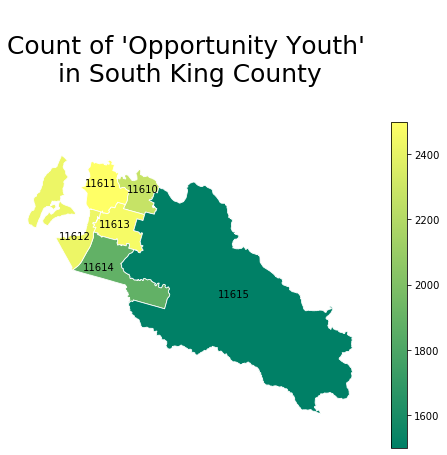

In [34]:
plt.rcParams['figure.figsize'] = [8, 6] #height, width

vmin, vmax = 1500, 2500

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(8,6))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('''\nCount of 'Opportunity Youth' \n in South King County \n \n''', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='summer', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

cbar = fig.colorbar(sm)

# create map
skc.plot(column=(skc['OYP']), cmap='summer', linewidth=0.8, ax=ax, edgecolor='1')

# Add Labels
skc['coords'] = skc['geometry'].apply(lambda x: x.representative_point().coords[:])
skc['coords'] = [coords[0] for coords in skc['coords']]

# Display names 
for idx, row in skc.iterrows():
    # plt.annotate(s=row['OYP'], xy=row['coords'],horizontalalignment='center',fontsize=5)
    plt.annotate(s=row['PUMA'], xy=row['coords'],horizontalalignment='center',fontsize=10)

In [148]:
oypp.head()

,PUMA,OYP
0,11610,1853.0
1,11611,2038.0
2,11612,1977.0
3,11613,2006.0
4,11614,1530.0


In [121]:
ipum_wa['PUMA'] = ipum_wa['PUMA'].astype('int')
variable = ipum_wa['PUMA'].between(11610,11615)


<ipython-input-121-de384be7d8d3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

